In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/'
                   'machine-learning-databases/wine/wine.data',
                   header=None)
data.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                'Alcalinity of ash', 'Magnesium', 'Total phenols',
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']
data.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split
X = data.drop("Class label",axis=1).values
y = data['Class label'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test) 

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend(loc="best")
    plt.tight_layout()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

lr = LogisticRegression(multi_class="ovr",random_state=1,solver = "lbfgs")
lr.fit(X_train_pca,y_train)

LogisticRegression(multi_class='ovr', random_state=1)

In [11]:
X_combined = np.vstack((X_train_pca,X_test_pca))
y_combined = np.hstack((y_train,y_test))

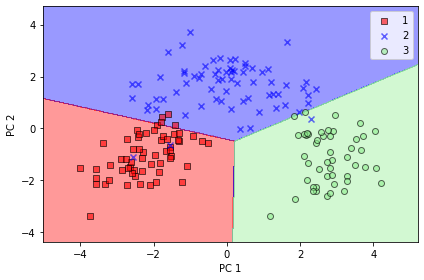

In [14]:
plot_decision_regions(X_combined,y_combined,classifier=lr)

Text(0.5, 1.0, 'train')

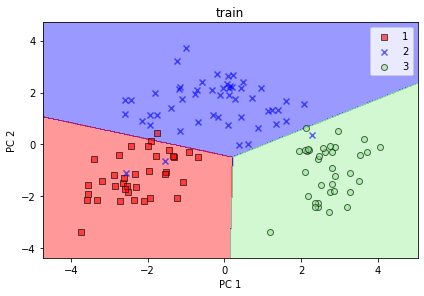

In [16]:
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.title("train")

Text(0.5, 1.0, 'test')

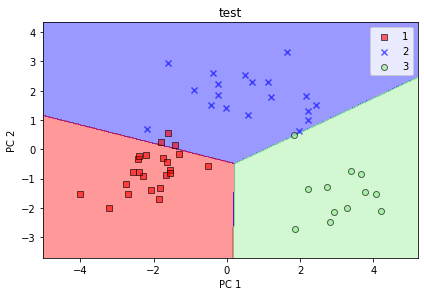

In [17]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.title("test")

In [23]:
from sklearn.metrics import classification_report
predictions =lr.predict(X_test_pca)
print(classification_report(predictions,y_test)) 

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        20
           2       1.00      0.83      0.90        23
           3       0.92      1.00      0.96        11

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.93      0.93      0.92        54

